In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
clicks_df = pd.read_csv('stud_dates_click.csv')
clicks_df

,code_module,code_presentation,id_student,final_result,-25,-24,-23,-22,-21,-20,...,260,261,262,263,264,265,266,267,268,269
0,AAA,2013J,11391,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AAA,2013J,28400,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AAA,2013J,30268,Withdrawn,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AAA,2013J,31604,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,AAA,2013J,32885,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,Fail,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32589,GGG,2014J,2645731,Distinction,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32590,GGG,2014J,2648187,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32591,GGG,2014J,2679821,Withdrawn,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
stud_df = pd.read_csv('./data/studentInfo.csv')
stud_df

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


In [4]:
score_df = pd.read_csv('final_student_assessment.csv')
score_df

,code_module,code_presentation,id_student,final_result,final_marks
0,AAA,2013J,11391,Pass,82.40
1,AAA,2013J,28400,Pass,65.40
2,AAA,2013J,30268,Withdrawn,0.00
3,AAA,2013J,31604,Pass,76.30
4,AAA,2013J,32885,Pass,55.00
...,...,...,...,...,...
32588,GGG,2014J,2640965,Fail,0.00
32589,GGG,2014J,2645731,Distinction,88.11
32590,GGG,2014J,2648187,Pass,76.67
32591,GGG,2014J,2679821,Withdrawn,91.50


In [5]:
# merge three table for further processing
data = pd.merge(stud_df, clicks_df, on=['code_module', 'code_presentation', 'id_student', 'final_result'], how='inner')
data = pd.merge(data, score_df, on=['code_module', 'code_presentation', 'id_student', 'final_result'], how='inner')
data

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,261,262,263,264,265,266,267,268,269,final_marks
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.40
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.40
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,76.30
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88.11
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76.67
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.50


In [6]:
# change the label of target
data['final_result'] = data['final_result'].map({'Pass':1, 'Distinction':1, 'Withdrawn':0, 'Fail':0})

# split the data into train and test
dataX = data.drop(columns='final_result')
target = data['final_result']
X_train, X_test, y_train, y_test = train_test_split(dataX, target, test_size=0.2, stratify=target)

In [7]:
def prepare_data(X, rule='W'):
    
    #clicks data
    cols = [str(i) for i in range(-25, 250)]
    X1 = X[cols]
    X1 = X1.T
    X1.index = pd.date_range(start='1/1/2014', periods=275)
    X1 = X1.resample(rule).sum()
    X1 = X1.T
    
    # demographic data
    gen_cols = ['gender', 'region', 'highest_education', 'imd_band', 
        'age_band', 'num_of_prev_attempts', 'studied_credits', 'disability']
    cat_cols = ['gender', 'region', 'highest_education', 'imd_band', 'age_band', 'disability']
    X2 = X[gen_cols]
    for col in cat_cols:
        X2 = pd.concat([X2, pd.get_dummies(X2[col], prefix=col, prefix_sep='_')], axis=1)
        X2.drop(columns=col, inplace=True)
    
    # Assessment score data
    score_cols = 'final_marks'
    X3 = X[score_cols]
    X3 = X3.to_numpy().reshape(-1,1)
        
    return X1, X2, X3

In [8]:
# prepare the data
X_train_clicks, X_train_demographics, X_train_score = prepare_data(X_train, rule='D')
X_test_clicks, X_test_demographics, X_test_score = prepare_data(X_test, rule='D')

# print stastic
print('Train Data:', X_train_clicks.shape, X_train_demographics.shape, X_train_score.shape)
print('Test Data: ', X_test_clicks.shape, X_test_demographics.shape, X_test_score.shape)
print('Train target count:', Counter(y_train))
print('Test target count:', Counter(y_test))

Train Data: (26074, 275) (26074, 37) (26074, 1)
Test Data:  (6519, 275) (6519, 37) (6519, 1)
Train target count: Counter({0: 13766, 1: 12308})
Test target count: Counter({0: 3442, 1: 3077})


In [9]:
from tensorflow.keras.layers import Dense, Input, Conv1D, BatchNormalization, AveragePooling1D, Flatten, Add, Multiply, Softmax, LSTM
from tensorflow.keras import Sequential, Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.activations import sigmoid

# First compare ANN, CNN and LSTM model

In [10]:
# Define ann model
def ann_model():
    ann = Sequential()
    ann.add(Input(shape=(X_train_clicks.shape[1], )))
    ann.add(Dense(128, activation='relu'))
    ann.add(Dense(64, activation='relu'))
    ann.add(Dense(16, activation='relu'))
    ann.add(Dense(1, activation='sigmoid'))
    # compile the model
    ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return ann

# define cnn model
def cnn_model():
    cnn = Sequential()
    cnn.add(Input(shape=(X_train_clicks.shape[1], 1)))
    cnn.add(Conv1D(32, kernel_size=2, activation='relu'))
    cnn.add(BatchNormalization())
    cnn.add(AveragePooling1D(2))
    cnn.add(Conv1D(64, kernel_size=2, activation='relu'))
    cnn.add(BatchNormalization())
    cnn.add(AveragePooling1D(2))
    cnn.add(Flatten())
    cnn.add(Dense(128,  activation='relu'))
    cnn.add(Dense(64,  activation='relu'))
    cnn.add(Dense(32,  activation='relu'))
    cnn.add(Dense(1,  activation='sigmoid'))
    # compile the model
    cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return cnn

# define lstm model
def lstm_model():
    lstm = Sequential()
    lstm.add(LSTM(25, activation='relu', input_shape=(X_train_clicks.shape[1],1), return_sequences=True))
    lstm.add(LSTM(10, activation='relu', return_sequences=False))
    lstm.add(Dense(1, activation='sigmoid'))
    # compile the model
    lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return lstm

In [11]:
def visualize_loss(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.legend(['Train', 'Validation'])
    plt.show()

# ANN

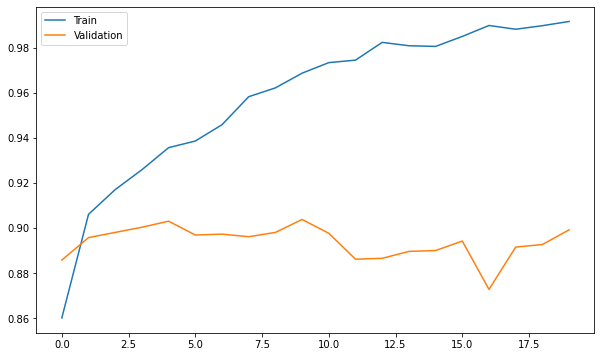

Accuracy:  0.9044331952753489
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      3147
           1       0.95      0.86      0.90      3372

    accuracy                           0.90      6519
   macro avg       0.91      0.91      0.90      6519
weighted avg       0.91      0.90      0.90      6519



,precision,recall,f1-score,accuracy,model
0,0.866647,0.947887,0.905448,0.904433,ANN
1,0.946701,0.863879,0.903396,0.904433,ANN


In [12]:
# model based on only clicks
path = 'model/ann_model.h5'
callback = ModelCheckpoint(path, save_best_only=True, save_weights_only=True, mode='max', monitor='val_accuracy', verbose=0)

ann = ann_model()
hist1 = ann.fit(X_train_clicks, y_train, validation_split=0.1, epochs=20, batch_size=30, verbose=0, callbacks=[callback])
visualize_loss(hist1)

# predict
ann.load_weights(path)
predict = ann.predict(X_test_clicks)
predict1 = np.where(predict>0.5, 1, 0)
print('Accuracy: ', accuracy_score(predict1, y_test))
print(classification_report(predict1, y_test))

# store in dataframe
result = pd.DataFrame(classification_report(predict1, y_test,output_dict=True)).T
result['accuracy'] = result.loc['accuracy', 'precision']
result = result.iloc[:2, [0,1,2,4]]
result['model'] = 'ANN'
result

# CNN

In [13]:
# Convert the data into 3-dimensional
X_train_clicks_2 = X_train_clicks.to_numpy().reshape(X_train_clicks.shape[0], X_train_clicks.shape[1], 1)
X_test_clicks_2 = X_test_clicks.to_numpy().reshape(X_test_clicks.shape[0], X_test_clicks.shape[1], 1)

# convert data into 3-d
X_train_demographics_2 = X_train_demographics.to_numpy().reshape(X_train_demographics.shape[0], X_train_demographics.shape[1], 1)
X_test_demographics_2 = X_test_demographics.to_numpy().reshape(X_test_demographics.shape[0], X_test_demographics.shape[1], 1)

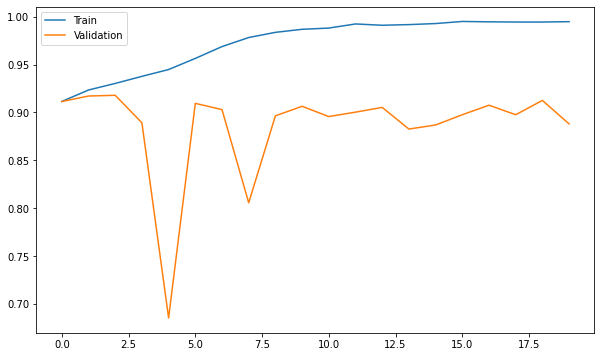

Accuracy:  0.9179321981899065
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      3131
           1       0.96      0.88      0.92      3388

    accuracy                           0.92      6519
   macro avg       0.92      0.92      0.92      6519
weighted avg       0.92      0.92      0.92      6519



,precision,recall,f1-score,accuracy,model
0,0.866647,0.947887,0.905448,0.904433,ANN
1,0.946701,0.863879,0.903396,0.904433,ANN
0,0.877106,0.964229,0.918606,0.917932,CNN
1,0.963601,0.875148,0.917247,0.917932,CNN


In [14]:
# model based on only clicks
path = 'model/cnn_model.h5'
callback = ModelCheckpoint(path, save_best_only=True, save_weights_only=True, mode='max', monitor='val_accuracy', verbose=0)

cnn = cnn_model()
hist2 = cnn.fit(X_train_clicks_2, y_train, validation_split=0.1, epochs=20, batch_size=30, verbose=0, callbacks=[callback])
visualize_loss(hist2)

# predict
cnn.load_weights(path)
predict= cnn.predict(X_test_clicks_2)
predict2 = np.where(predict>0.5, 1, 0)
print('Accuracy: ', accuracy_score(predict2, y_test))
print(classification_report(predict2, y_test))

# store and concat with result
r = pd.DataFrame(classification_report(predict2, y_test,output_dict=True)).T
r['accuracy'] = r.loc['accuracy', 'precision']
r = r.iloc[:2, [0,1,2,4]]
r['model'] = 'CNN'

result = pd.concat([result, r])
result

# LSTM

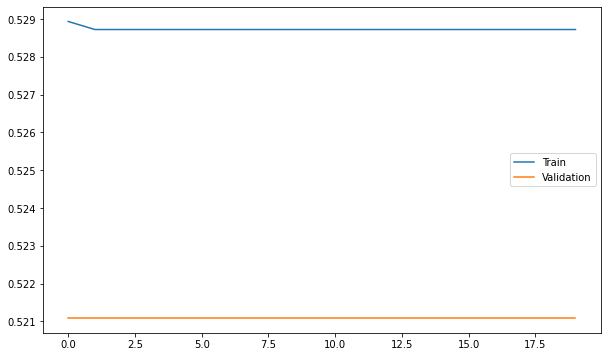

Accuracy:  0.5279950912716674
              precision    recall  f1-score   support

           0       1.00      0.53      0.69      6519
           1       0.00      0.00      0.00         0

    accuracy                           0.53      6519
   macro avg       0.50      0.26      0.35      6519
weighted avg       1.00      0.53      0.69      6519



,precision,recall,f1-score,accuracy,model
0,0.866647,0.947887,0.905448,0.904433,ANN
1,0.946701,0.863879,0.903396,0.904433,ANN
0,0.877106,0.964229,0.918606,0.917932,CNN
1,0.963601,0.875148,0.917247,0.917932,CNN
0,1.000000,0.527995,0.691095,0.527995,LSTM
1,0.000000,0.000000,0.000000,0.527995,LSTM


In [15]:
# model based on only clicks
path = 'model/lstm_model.h5'
callback = ModelCheckpoint(path, save_best_only=True, save_weights_only=True, mode='max', monitor='val_accuracy', verbose=0)

lstm = lstm_model()
hist3 = lstm.fit(X_train_clicks_2, y_train, validation_split=0.1, epochs=20, batch_size=30, verbose=0, callbacks=[callback])
visualize_loss(hist3)

# predict
lstm.load_weights(path)
predict = lstm.predict(X_test_clicks_2)
predict3 = np.where(predict>0.5, 1, 0)
print('Accuracy: ', accuracy_score(predict3, y_test))
print(classification_report(predict3, y_test))

# store and concat with result
r = pd.DataFrame(classification_report(predict3, y_test,output_dict=True)).T
r['accuracy'] = r.loc['accuracy', 'precision']
r = r.iloc[:2, [0,1,2,4]]
r['model'] = 'LSTM'

result = pd.concat([result, r])
result

Text(0, 0.5, 'Training Accuracy')

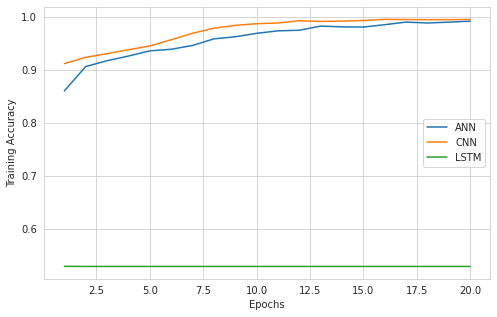

In [16]:
sns.set_style('whitegrid')
epochs = list(range(1, 21))
plt.figure(figsize=(8, 5))
plt.plot(epochs, hist1.history['accuracy'], label='ANN')
plt.plot(epochs, hist2.history['accuracy'], label='CNN')
plt.plot(epochs, hist3.history['accuracy'], label='LSTM')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')

Text(0, 0.5, 'Validation Accuracy')

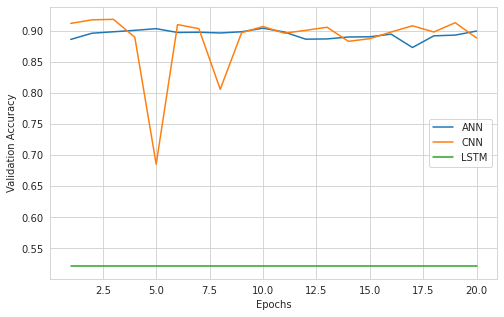

In [17]:
sns.set_style('whitegrid')
epochs = list(range(1, 21))
plt.figure(figsize=(8, 5))
plt.plot(epochs, hist1.history['val_accuracy'], label='ANN')
plt.plot(epochs, hist2.history['val_accuracy'], label='CNN')
plt.plot(epochs, hist3.history['val_accuracy'], label='LSTM')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')